In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [7]:
# fix 'embarrassed' spelling error:

public_df['specificEmotion'] = public_df['specificEmotion'].replace('embarrased', 'embarrassed')

In [8]:
public_df['trigger']

0       Returned from exercising at the climbing gym. ...
1                                                Workday 
2                                      Relationship, work
3       Hanging out with my family and just coming hom...
4       I actually talked to a faculty member instead ...
5       Not sleeping well because we're in a new place...
6       At a friend's wedding. Reunited with Med schoo...
7                                                     Ill
8                                                    Flow
9         Exercise, nature, Nikki's family, creative work
10      Thinking about backup and how I do not want to...
11                                    Outside with my dog
12                                         Finishing work
13                 Walking to work and inhaling fresh air
14      Coming back from a trip and thinking about wor...
15                                    Being with a friend
16          Dinner with my wife and playing with my kids 
17      Upcomi

### Create subset dataframe with parent/child emotions, triggers, responses

In [9]:
subset = public_df[['generalEmotion', 'specificEmotion',
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 
        'emotionResponse',
       'emotionDuration', 'emotionResponseHelpful']]

### Match parent/child emotions/triggers/responses in dictionaries

In [10]:
specific_emotions = defaultdict(int)
specific_triggers = defaultdict(int)
emotion_response_efficacy = defaultdict(int)

In [11]:
cnt = Counter()
def populate_dict(dictionary, col):
    for emotion in col:
        dictionary[emotion] += 1
    return dictionary

In [12]:
populate_dict(specific_emotions, subset['specificEmotion'])
specific_emotions

defaultdict(int,
            {'afraid': 85,
             'angry': 169,
             'annoyed': 336,
             'anxious': 747,
             'ashamed': 54,
             'discouraged': 292,
             'embarrassed': 34,
             'enthusiastic': 447,
             'excited': 358,
             'frustrated': 386,
             'happy': 959,
             'irritated': 339,
             'joyful': 347,
             'lonely': 156,
             'nervous': 226,
             'notListed': 532,
             'peaceful': 1320,
             'sad': 278,
             'worried': 361})

In [13]:
populate_dict(specific_triggers, subset['specificTrigger'])
specific_triggers

defaultdict(int,
            {'bodyImage': 31,
             'clientChallenge': 143,
             'clientEnjoyable': 74,
             'climateChange': 6,
             'colleagueChallenge': 262,
             'colleagueEnjoyable': 187,
             'dislikeJob': 98,
             'domesticPolitics': 37,
             'exercise': 237,
             'familyChallenge': 277,
             'financialStress': 78,
             'friendsChallenge': 189,
             'globalPolitics': 11,
             'healthProblems': 207,
             'healthcare': 19,
             'lackMotivation': 249,
             'lonely': 245,
             nan: 35,
             'other': 226,
             'paperwork': 106,
             'patientChallenge': 61,
             'patientEnjoyable': 54,
             'play': 948,
             'productivity': 484,
             'relaxation': 614,
             'sleepDeprived': 154,
             'soChallenge': 266,
             'spiritual': 161,
             'success': 258,
             'time

In [14]:
populate_dict(emotion_response_efficacy, subset['emotionResponseHelpful'])
emotion_response_efficacy

defaultdict(int,
            {'helpful': 1129,
             nan: 3431,
             'neutral': 1607,
             'other': 76,
             'regretful': 130,
             'unhelpful': 944,
             'veryHelpful': 109})

## Code that actually works:

In [15]:
def create_dictionary(df, col1, col2):
    temp = dict(df.groupby([col1])[col2].value_counts())
    new_dict = defaultdict(dict)
    for (outer, inner), value in temp.items():
        new_dict[outer][inner] = value
    return new_dict

In [16]:
emotions = create_dictionary(subset, 'generalEmotion', 'specificEmotion')
triggers = create_dictionary(subset, 'generalTrigger', 'specificTrigger')
responses = create_dictionary(subset, 'emotionResponse', 'emotionResponseHelpful')

In [17]:
print ('EMOTIONS: ', emotions)
print ()
print ('TRIGGERS: ', triggers)
print ()
print ('RESPONSES:', responses)

EMOTIONS:  defaultdict(<class 'dict'>, {'anger': {'frustrated': 386, 'irritated': 339, 'annoyed': 336, 'angry': 169}, 'enjoyment': {'peaceful': 1320, 'happy': 959, 'enthusiastic': 447, 'excited': 358, 'joyful': 347}, 'fear': {'anxious': 747, 'worried': 361, 'nervous': 226, 'afraid': 85}, 'other': {'notListed': 532, 'ashamed': 54, 'embarrassed': 34}, 'sadness': {'discouraged': 292, 'sad': 278, 'lonely': 156}})

TRIGGERS:  defaultdict(<class 'dict'>, {'other': {'other': 177}, 'personalConcerns': {'healthProblems': 207, 'sleepDeprived': 154, 'financialStress': 78, 'bodyImage': 31}, 'socialStress': {'familyChallenge': 277, 'soChallenge': 266, 'lonely': 245, 'friendsChallenge': 189}, 'socialSupport': {'timeFamily': 402, 'timeFriends': 367, 'timeSO': 274}, 'wellbeing': {'play': 948, 'relaxation': 614, 'exercise': 237, 'spiritual': 161}, 'workSatisfaction': {'productivity': 484, 'success': 258, 'colleagueEnjoyable': 187, 'clientEnjoyable': 74, 'patientEnjoyable': 54}, 'workStress': {'workload

In [18]:
temp = dict(subset.groupby(['generalTrigger'])['specificTrigger'].value_counts())
new_dict =defaultdict(dict)
for (outer, inner), value in temp.items():
    new_dict[outer][inner] = value
new_dict

defaultdict(dict,
            {'other': {'other': 177},
             'personalConcerns': {'bodyImage': 31,
              'financialStress': 78,
              'healthProblems': 207,
              'sleepDeprived': 154},
             'socialStress': {'familyChallenge': 277,
              'friendsChallenge': 189,
              'lonely': 245,
              'soChallenge': 266},
             'socialSupport': {'timeFamily': 402,
              'timeFriends': 367,
              'timeSO': 274},
             'wellbeing': {'exercise': 237,
              'play': 948,
              'relaxation': 614,
              'spiritual': 161},
             'workSatisfaction': {'clientEnjoyable': 74,
              'colleagueEnjoyable': 187,
              'patientEnjoyable': 54,
              'productivity': 484,
              'success': 258},
             'workStress': {'clientChallenge': 143,
              'colleagueChallenge': 262,
              'dislikeJob': 98,
              'healthcare': 19,
              '

## Graphs of emotions/triggers/responses

- set colorcoding by parent/child relationships
- function to plot distributions

In [22]:
palette = {'enjoyment': '#c98709', 'fear': '#8c37a3', 'anger': '#810f09', 'sadness': '#0087ab', 'other': '#e6e71a', 
           'wellbeing': '#a1759c', 'workStress': '#741a1a', 'workSatisfaction': '#9eb6b8', 'socialSupport': '#767ba5', 
           'socialStress': '#678900', 'personalConcerns': '#c14b3d', 'other': '#fd670f', 'world': '#98b280', 
           'observation': '#2c98a1', 'action': '#854006', 'rumination': '#3c0d4d', 'suppression': '#3c0d4d', 
           'words': '#c17ee7', 'talking': '#c14b3d', 'avoidance': '#e7cb21', 'change': '#93b8c9', 'withdrawal': '#6e7d89'}

In [23]:
def colorcode(dictionary):
#     for emotion in subset['generalEmotion']:
#         if emotion == 'anger':
#             color[subset['specificEmotion']] = palette['anger']
# #         elif emotion == 'peaceful' or emotion == 'happy' or emotion == 'enthusiastic' or emotion == 'excited' or emotion == 'joyful':
# #             color[emotion] = palette['enjoyment']
# #         elif emotion == 'anxious' or emotion == 'worried' or emotion == 'nervous' or emotion == 'afraid':
# #             color[emotion] = palette['fear']
# #         elif emotion == 'notListed' or emotion == 'ashamed' or emotion == 'embarrassed':
# #             color[emotion] = palette['other']
#         else:
#             color[subset['specificEmotion']] = palette['sadness']
#     return color
    color = defaultdict(dict)
    for key1, value in dictionary.items():
        for key2 in value:
            color[key2] = palette[key1]
    return color

In [25]:
color_emotion = colorcode(emotions)
color_trigger = colorcode(triggers)
color_response = colorcode(responses)

In [26]:
color_emotion

defaultdict(dict,
            {'afraid': '#8c37a3',
             'angry': '#810f09',
             'annoyed': '#810f09',
             'anxious': '#8c37a3',
             'ashamed': '#fd670f',
             'discouraged': '#0087ab',
             'embarrassed': '#fd670f',
             'enthusiastic': '#c98709',
             'excited': '#c98709',
             'frustrated': '#810f09',
             'happy': '#c98709',
             'irritated': '#810f09',
             'joyful': '#c98709',
             'lonely': '#0087ab',
             'nervous': '#8c37a3',
             'notListed': '#fd670f',
             'peaceful': '#c98709',
             'sad': '#0087ab',
             'worried': '#8c37a3'})

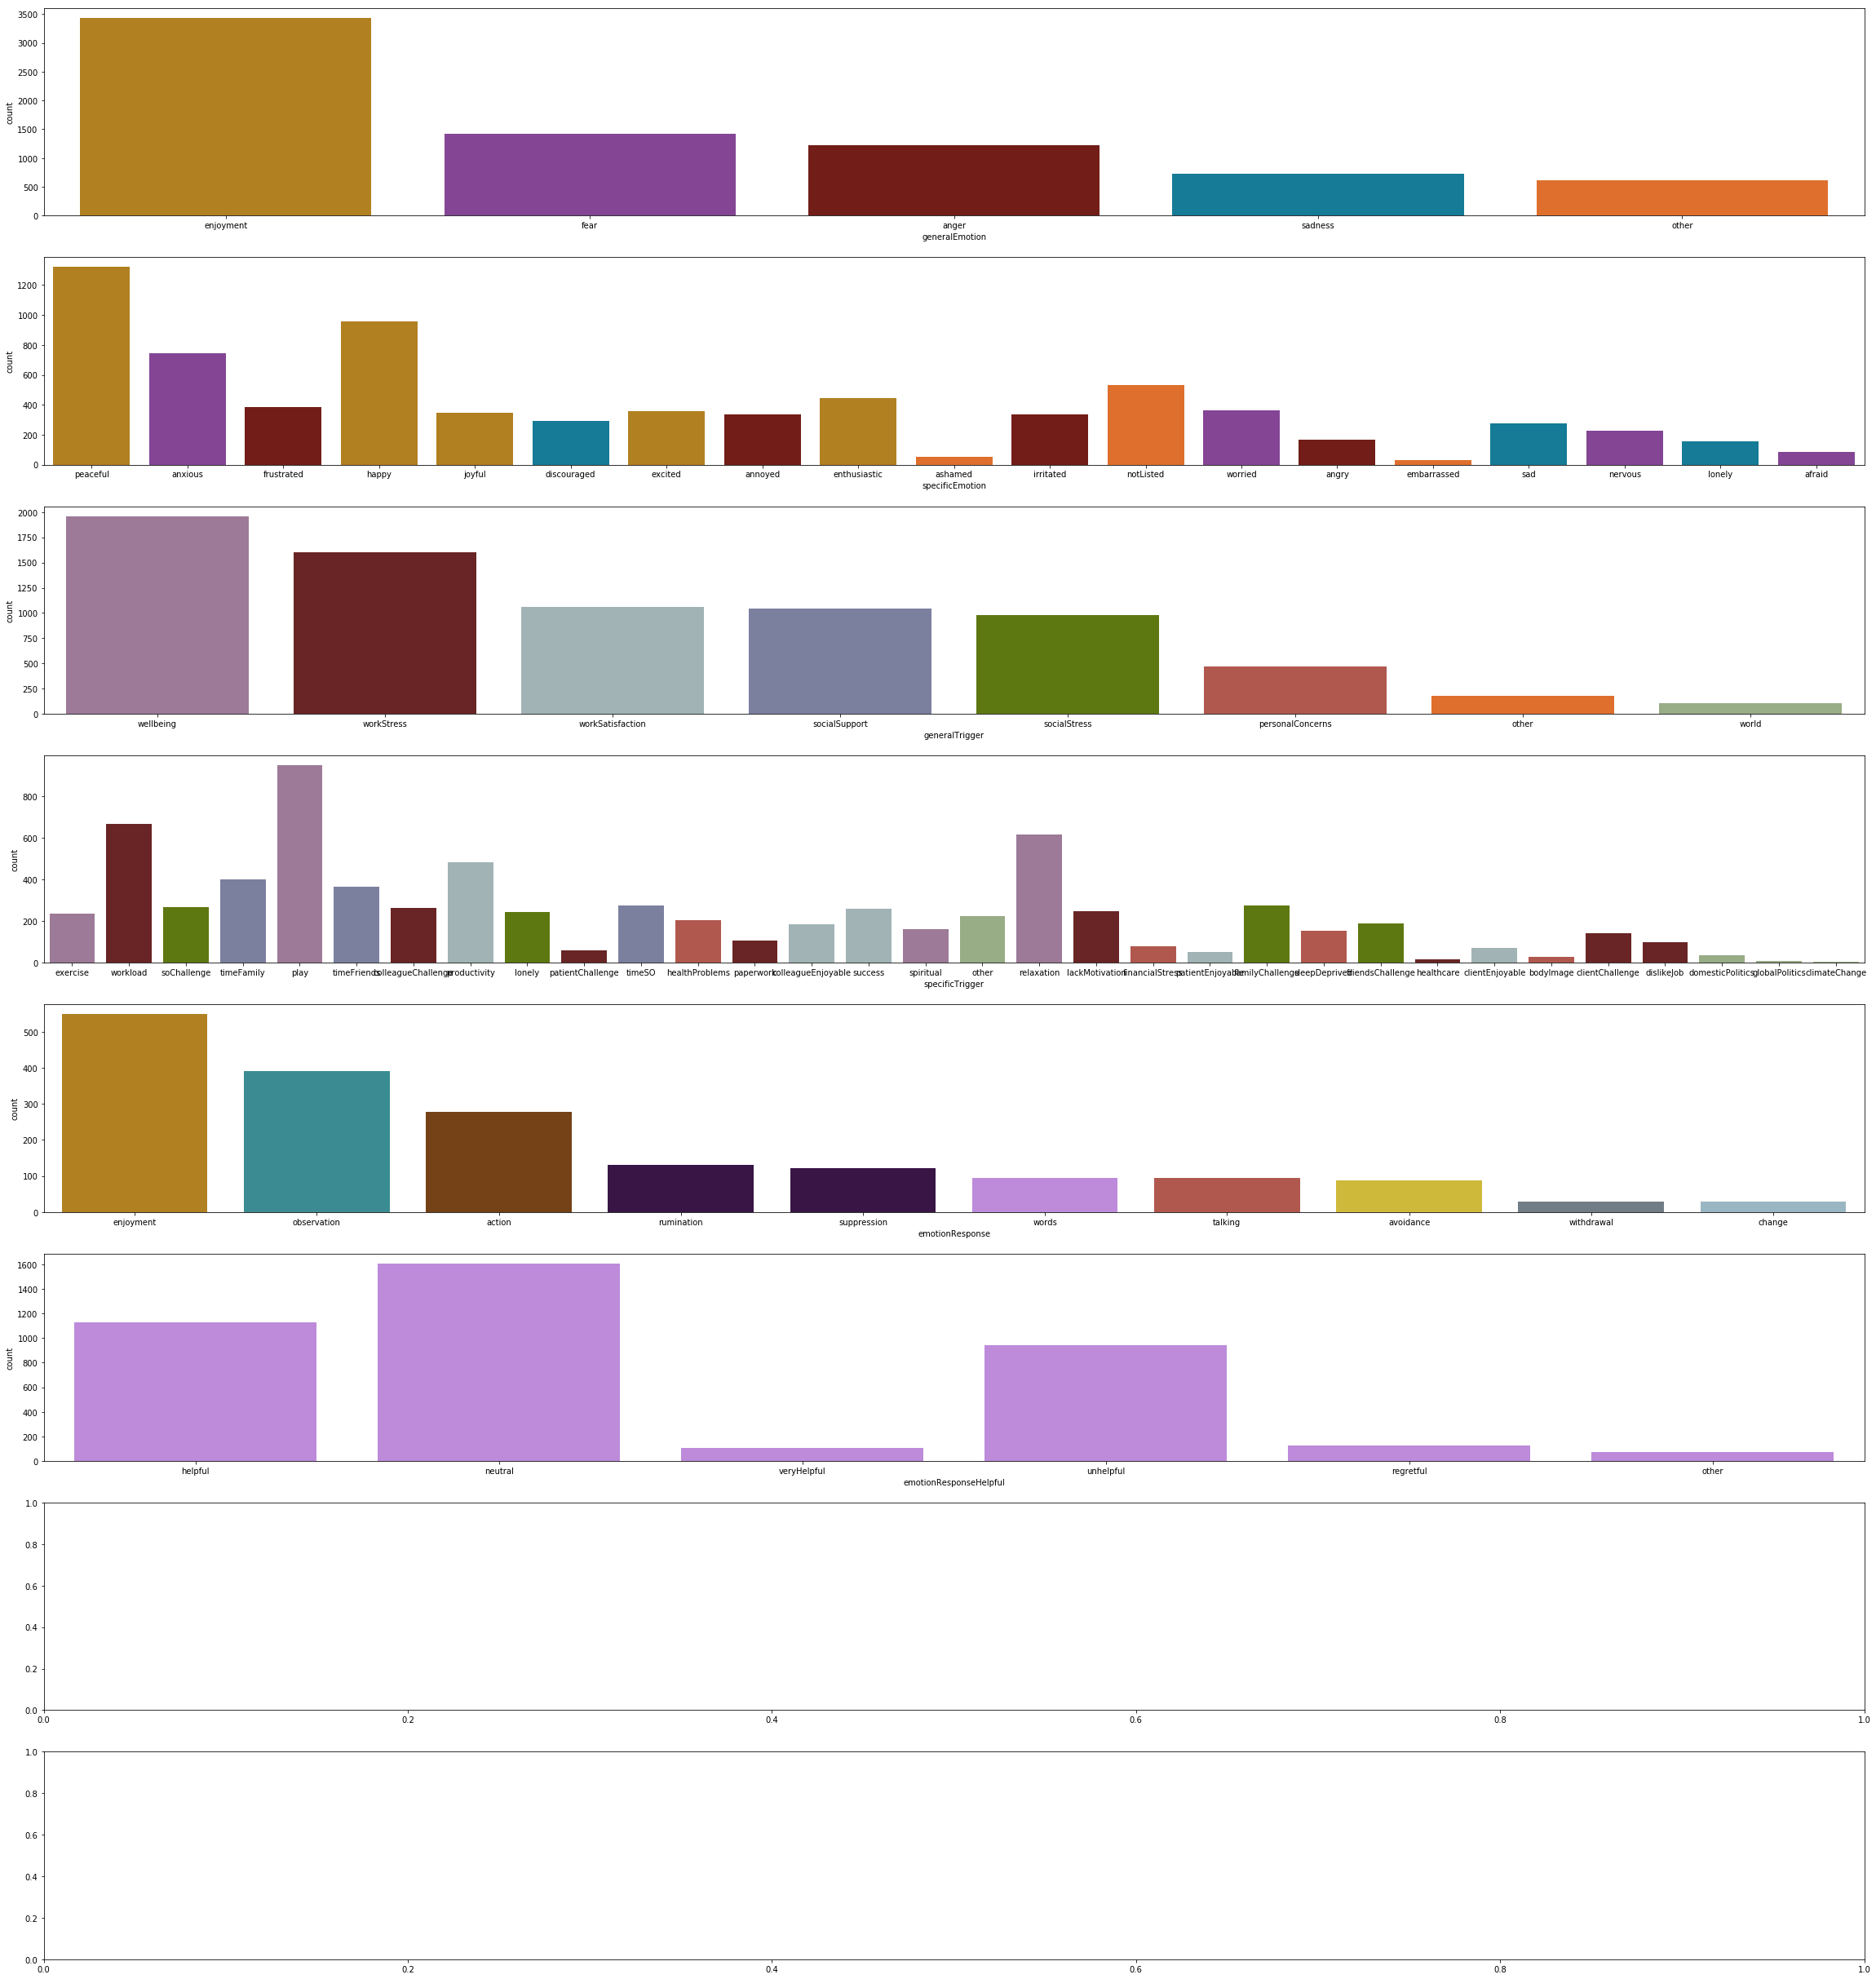

In [28]:
fig, axes = plt.subplots(8,1, figsize=(40,44))
sns.countplot(x='generalEmotion', data=subset, orient='h', order = subset['generalEmotion'].value_counts().index, palette=palette, ax=axes[0]);
sns.countplot(x='specificEmotion', data=subset, orient='h', palette=color_emotion, ax=axes[1]);
sns.countplot(x='generalTrigger', data=subset, orient='h', order = subset['generalTrigger'].value_counts().index, palette=palette, ax=axes[2]);
sns.countplot(x='specificTrigger', data=subset, orient='h', palette=color_trigger, ax=axes[3]);
sns.countplot(x='emotionResponse', data=subset, orient='h', order = subset['emotionResponse'].value_counts().index, palette=palette, ax=axes[4]);
sns.countplot(x='emotionResponseHelpful', data=subset, orient='h', palette=color_response, ax=axes[5]);

# turn this into a plotting function... and set up colors for other graphs.
# response colorcoding doesn't work because all categories of helpful/not/etc are included in all emotional response categories.
# Need to figure out a better way to classify and plot these!!

In [88]:
emotions.keys()

dict_keys(['anger', 'enjoyment', 'fear', 'other', 'sadness'])

In [90]:
emotions.values()

dict_values([{'frustrated': 386, 'irritated': 339, 'annoyed': 336, 'angry': 169}, {'peaceful': 1320, 'happy': 959, 'enthusiastic': 447, 'excited': 358, 'joyful': 347}, {'anxious': 747, 'worried': 361, 'nervous': 226, 'afraid': 85}, {'notListed': 532, 'ashamed': 54, 'embarrassed': 34}, {'discouraged': 292, 'sad': 278, 'lonely': 156}])

In [91]:
emotions.items()

dict_items([('anger', {'frustrated': 386, 'irritated': 339, 'annoyed': 336, 'angry': 169}), ('enjoyment', {'peaceful': 1320, 'happy': 959, 'enthusiastic': 447, 'excited': 358, 'joyful': 347}), ('fear', {'anxious': 747, 'worried': 361, 'nervous': 226, 'afraid': 85}), ('other', {'notListed': 532, 'ashamed': 54, 'embarrassed': 34}), ('sadness', {'discouraged': 292, 'sad': 278, 'lonely': 156})])